<a href="https://colab.research.google.com/github/Alisonia/sustainable-energy/blob/main/sustainable_energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning on Sustainable Energy System**

## **1 Data Pre-processing**

### Data Exploration

In [ ]:
#Importing general librabry for data manipulation and preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [ ]:
#uploading data into colab environment
from google.colab import files
uploaded = files.upload()

Saving global-data-on-sustainable-energy (1).csv to global-data-on-sustainable-energy (1).csv


In [ ]:
#loading the data
import io
df = pd.read_csv(io.BytesIO(uploaded['global-data-on-sustainable-energy (1).csv']))
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,"6,52,230",33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,"6,52,230",33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,"6,52,230",33.93911,67.709953


In [ ]:
df.shape

(3649, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3649.0,2.010038e+03,6.054228e+00,2000.000000,2005.000000,2.010000e+03,2.015000e+03,2.020000e+03
Access to electricity (% of population),3639.0,7.893370e+01,3.027554e+01,1.252269,59.800890,9.836157e+01,1.000000e+02,1.000000e+02
Access to clean fuels for cooking,3480.0,6.325529e+01,3.904366e+01,0.000000,23.175000,8.315000e+01,1.000000e+02,1.000000e+02
Renewable-electricity-generating-capacity-per-capita,2718.0,1.131375e+02,2.441673e+02,0.000000,3.540000,3.291000e+01,1.122100e+02,3.060190e+03
Financial flows to developing countries (US $),1560.0,9.422400e+07,2.981544e+08,0.000000,260000.000000,5.665000e+06,5.534750e+07,5.202310e+09
Renewable energy share in the total final energy consumption (%),3455.0,3.263816e+01,2.989490e+01,0.000000,6.515000,2.330000e+01,5.524500e+01,9.604000e+01
Electricity from fossil fuels (TWh),3628.0,7.036500e+01,3.480519e+02,0.000000,0.290000,2.970000e+00,2.683750e+01,5.184130e+03
Electricity from nuclear (TWh),3523.0,1.345019e+01,7.300662e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,8.094100e+02
Electricity from renewables (TWh),3628.0,2.396801e+01,1.044311e+02,0.000000,0.040000,1.470000e+00,9.600000e+00,2.184940e+03
Low-carbon electricity (% electricity),3607.0,3.680118e+01,3.431488e+01,0.000000,2.877847,2.786507e+01,6.440379e+01,1.000000e+02


### Data Cleaning and wrangling


In [ ]:
#renaming columns for easier identification
df = df.rename(columns = {"Density\\n(P/Km2)":"Density (P/km2)",
                  "Value_co2_emissions_kt_by_country":"CO2 emissions value by country (kT)",
                  "Access to clean fuels for cooking":"Access to clean fuels for cooking (% of population)",
                  "gdp_growth":"GDP growth",
                  "gdp_per_capita":"GDP per capita",
                  "Renewable-electricity-generating-capacity-per-capita":"Renewable electricity Generating Capacity per capita"
                  })

In [ ]:
#converting Density  (P/km2) and Land Area (km2) to numeric datatype

df['Density (P/km2)'] = df['Density (P/km2)'].str.replace(',', '')
df['Density (P/km2)'] = pd.to_numeric(df['Density (P/km2)'])

In [ ]:
# Drop unusual columns
df.drop(columns=['Longitude', 'Latitude', 'Land Area(Km2)'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 18 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking (% of population)               3480 non-null   float64
 4   Renewable electricity Generating Capacity per capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

Text(0.5, 1.0, 'Variables and Number of Missing items')

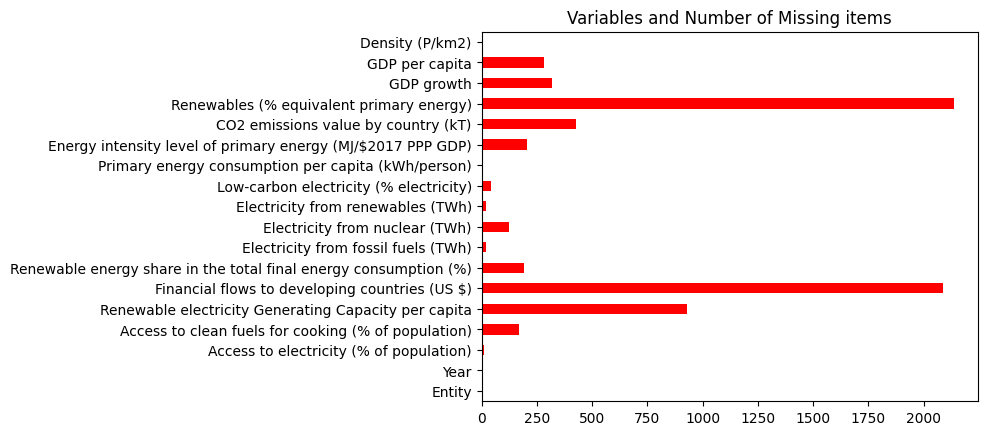

In [ ]:
#checking and handling missing values
df.isna().sum().plot(kind = 'barh', color="red")
plt.title("Variables and Number of Missing items")

In [ ]:
#dropping variables with highest missing values
df.drop(columns=['Renewables (% equivalent primary energy)',
                 'Financial flows to developing countries (US $)',
                 'Renewable electricity Generating Capacity per capita'], axis=1, inplace=True)

In [ ]:
# Filling less missing columns
numerical_columns = [
    'Access to electricity (% of population)',
    'Access to clean fuels for cooking (% of population)',
    'Renewable energy share in the total final energy consumption (%)',
    'Electricity from fossil fuels (TWh)',
    'Electricity from nuclear (TWh)',
    'Electricity from renewables (TWh)',
    'Low-carbon electricity (% electricity)',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'CO2 emissions value by country (kT)',
    'GDP growth',
    'GDP per capita',
    'Density (P/km2)'
]

# Impute missing values with mean for each numerical column
for column in numerical_columns:
    df[column].fillna(df[column].mean(), inplace=True)

#checking
df.isnull().sum()

Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking (% of population)                 0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
CO2 emissions value by country (kT)                                 0
GDP growth                                                          0
GDP per capita                                                      0
Density (P/km2)     

In [ ]:
df.shape

(3649, 15)

In [ ]:
#dropping duplicate entries
df.drop_duplicates(keep='first', inplace=True)
df.shape

(3649, 15)

In [ ]:
#removing outliers
from scipy import stats

#numerical_columns = [
 #   'Access to electricity (% of population)',
  #  'Access to clean fuels for cooking (% of population)',
   # 'Renewable energy share in the total final energy consumption (%)',
    #'Electricity from fossil fuels (TWh)',
    #'Electricity from nuclear (TWh)',
    #'Electricity from renewables (TWh)',
    #'Low-carbon electricity (% electricity)',
    #'Primary energy consumption per capita (kWh/person)',
    #'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    #'CO2 emissions value by country (kT)',
    #'GDP growth',
    #'GDP per capita',
    #'Density (P/km2)'
#]

# Set the Z-score threshold for outlier removal
#z_score_threshold = 3

# Loop through each numerical column and remove outliers
#for column in numerical_columns:
 #   z_scores = stats.zscore(df[column])
  #  df = df[(z_scores < z_score_threshold) & (z_scores > -z_score_threshold)]

# Reset the index after removing outliers
#df.reset_index(drop=True, inplace=True)

In [ ]:
#dataframe after removing outliers
#df.shape

(3111, 15)

In [ ]:
df.to_csv('dfcleaned.csv', index=False)

### Exploratory Data Analysis

In [ ]:
#Creating function to plot world map of energy consumption and CO2 emission
import plotly.graph_objects as go
# Function to plot features on world map
def plot_world_map(column_name):
    fig = go.Figure()
    for year in range(2000, 2021):
        # Filter the data for the current year
        filtered_df = df[df['Year'] == year]

        # Create a choropleth trace for the current year
        trace = go.Choropleth(
            locations=filtered_df['Entity'],
            z=filtered_df[column_name],
            locationmode='country names',
            colorscale='Electric',  # Use a different color scale for better contrast
            colorbar=dict(title=column_name),
            zmin=df[column_name].min(),
            zmax=df[column_name].max(),
            visible=False  # Set the trace to invisible initially
        )
      # Add the trace to the figure
        fig.add_trace(trace)

    # Set the first trace to visible
    fig.data[0].visible = True

    # Create animation steps
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(fig.data)},  # Set all traces to invisible
                  {'title_text': f'{column_name} Map - {2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
            label=str(2000 + i)  # Set the label for each step
        )
        step['args'][0]['visible'][i] = True  # Set the current trace to visible
        steps.append(step)

    # Create the slider
    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "Year: ", "font": {"size": 14}},  # Increase font size for slider label
    )]

    # Update the layout of the figure with increased size and change the template
    fig.update_layout(
        title_text=f'{column_name} World Map',  # Set the initial title
        title_font_size=20,  # Increase title font size
        title_x=0.5,  # Center the title
        geo=dict(
            showframe=True,
            showcoastlines=False,
            projection_type='natural earth'
        ),
        sliders=sliders,
        height=500,  # Set the height of the figure in pixels
        width=1000,  # Set the width of the figure in pixels
        font=dict(family='Arial', size=12),  # Customize font family and size for the whole figure
        margin=dict(t=80, l=50, r=50, b=50),  # Add margin for better layout spacing
        # Change the template to 'plotly_dark'
        )

    # Show the figure
    fig.show()

In [ ]:
select_col=df.columns
select_col = ['Primary energy consumption per capita (kWh/person)',
              'CO2 emissions value by country (kT)']

for i in select_col:
    column_name = i
    print(column_name)
    plot_world_map(column_name)

Primary energy consumption per capita (kWh/person)


CO2 emissions value by country (kT)


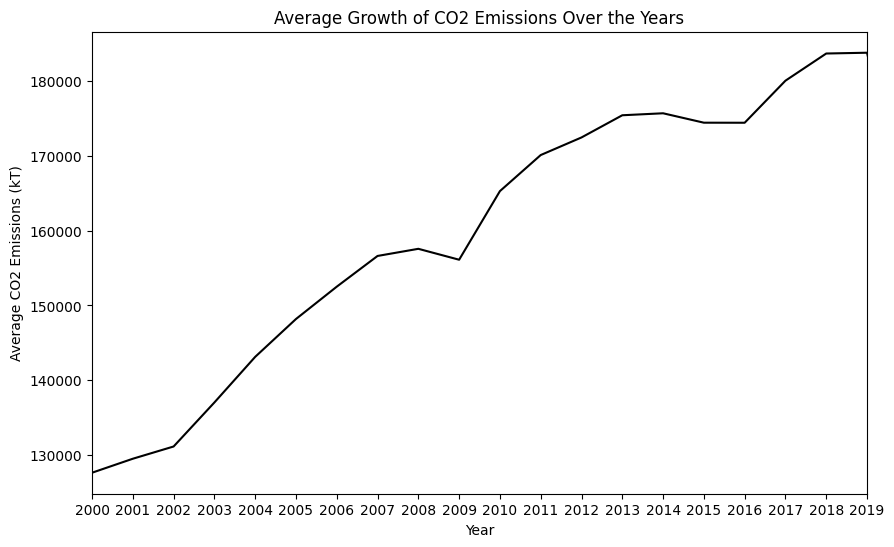

In [ ]:
#Visualizing growth of energy consumption and co2 emission over the years
average_co2_by_year = df.groupby('Year')['CO2 emissions value by country (kT)'].mean()
average_co2_by_year = average_co2_by_year.reset_index()

plt.figure(figsize = (10, 6))
sns.lineplot(data = average_co2_by_year, x = 'Year', y = 'CO2 emissions value by country (kT)', color = 'black')
plt.title('Average Growth of CO2 Emissions Over the Years')
plt.xlabel('Year')
plt.ylabel('Average CO2 Emissions (kT)')

plt.xticks(average_co2_by_year['Year'], rotation = 0, ha = 'center')
plt.xlim(2000, 2019)
#plt.ylim(50000,65000)

plt.show()

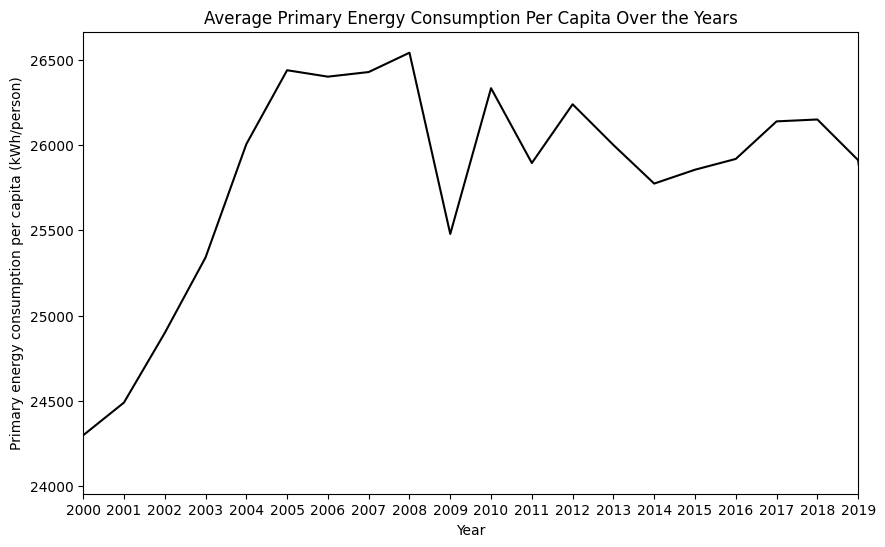

In [ ]:
energy_consumption_by_year = df.groupby('Year')['Primary energy consumption per capita (kWh/person)'].mean()
energy_consumption_by_year = energy_consumption_by_year.reset_index()

plt.figure(figsize = (10, 6))
sns.lineplot(data = energy_consumption_by_year, x = 'Year', y = 'Primary energy consumption per capita (kWh/person)', color = 'black')
plt.title('Average Primary Energy Consumption Per Capita Over the Years')
plt.xlabel('Year')
plt.ylabel('Primary energy consumption per capita (kWh/person)')

plt.xticks(energy_consumption_by_year['Year'], rotation = 0, ha = 'center')
plt.xlim(2000, 2019)

plt.show()

In [ ]:
#visualizing top 5 countries with highest energy consumption and co2 emission

# Calculate average CO2 emissions for each country
avg_co2_emissions = df.groupby('Entity')[''].mean().sort_values(ascending=False)

# Select top five countries
top_five_countries = avg_co2_emissions.head(5)

# Filter the data for the top five countries
top_five_data = df[df['entity'].isin(top_five_countries.index)]

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='entity', y='co2_emissions', data=top_five_data, ci=None)
plt.title('Top Five Countries with Average CO2 Emissions')
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (kT)')
plt.show()


#select_col = ['Primary energy consumption per capita (kWh/person)',
 #             'CO2 emissions value by country (kT)']


In [ ]:
#visualizing top 5 countries with highest energy consumption and co2 emission

# Calculate average CO2 emissions for each country
avg_co2_emissions = df.groupby('Entity')['CO2 emissions value by country (kT)'].mean()

# Select top five countries
top_five_countries = avg_co2_emissions.nlargest(5)
least_five_countries = avg_co2_emissions.nsmallest(5)

#set the subplot

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot for top five
sns.barplot(ax=axes[0], x = top_five_countries.index, y = top_five_countries.values)
axes[0].set_title('Top Five Countries with Average CO2 Emissions')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Average CO2 Emissions (kT)')

# Plot for least five
sns.barplot(ax=axes[1], x=least_five_countries.values, y=least_five_countries.index)
axes[1].set_title('Least Five Countries with Average CO2 Emissions')
axes[1].set_xlabel('Average CO2 Emissions (kT)')
axes[1].set_ylabel('Country')

plt.xticks(rotation = 45, ha = 'center')
plt.tight_layout()
plt.show()


#select_col = ['Primary energy consumption per capita (kWh/person)',
 #             'CO2 emissions value by country (kT)']


In [ ]:
#visualizing top 5 countries with highest energy consumption

# Calculate Average Energy Consumptions for each country
avg_energy_consump = df.groupby('Entity')['Primary energy consumption per capita (kWh/person)'].mean()

# Select top five countries
top_five_countries = avg_energy_consump.nlargest(5)
least_five_countries = avg_energy_consump.nsmallest(5)

#set the subplot

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot for top five
sns.barplot(ax=axes[0], x = top_five_countries.index, y = top_five_countries.values)
axes[0].set_title('Top Five Countries with Average Energy Consumptions')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Primary energy consumption per capita (kWh/person)')

# Plot for least five
sns.barplot(ax=axes[1], x=least_five_countries.values, y=least_five_countries.index)
axes[1].set_title('Least Five Countries with Average Energy Consumptions')
axes[1].set_xlabel('Primary energy consumption per capita (kWh/person)')
axes[1].set_ylabel('Country')

plt.xticks(rotation = 45, ha = 'center')
plt.tight_layout()
plt.show()

In [ ]:
#select_col = ['Primary energy consumption per capita (kWh/person)',
 #             'CO2 emissions value by country (kT)']

### Future engineering

In [ ]:
#Correlation among the variables
df_corr = df.drop(columns=['Primary energy consumption per capita (kWh/person)',
              'CO2 emissions value by country (kT)'], axis=1).corr()

plt.figure(figsize=(6,6))
sns.heatmap(df_corr, annot=True, fmt=".1f", cmap="viridis", linecolor="white", linewidth=1)


#select_col =['Primary energy consumption per capita (kWh/person)',
 #             'CO2 emissions value by country (kT)']

In [ ]:
#drop highly correlated  column
df.drop(columns=['Access to electricity (% of population)','Access to clean fuels for cooking (% of population)',
                'Electricity from renewables (TWh)'], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 12 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Renewable energy share in the total final energy consumption (%)  3649 non-null   float64
 3   Electricity from fossil fuels (TWh)                               3649 non-null   float64
 4   Electricity from nuclear (TWh)                                    3649 non-null   float64
 5   Low-carbon electricity (% electricity)                            3649 non-null   float64
 6   Primary energy consumption per capita (kWh/person)                3649 non-null   float64
 7   Energy intensity level of primary

In [ ]:
df_copy = df
df_copy.head()  #should in case

In [ ]:
#uploading NEW CLEANED AND BEGIN THE MODELING PHASE HERE
from google.colab import files
uploaded = files.upload()

Saving dfcleaned.csv to dfcleaned.csv


In [ ]:
#loading the data
import io
df = pd.read_csv(io.BytesIO(uploaded['dfcleaned.csv']))
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking (% of population),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),CO2 emissions value by country (kT),GDP growth,GDP per capita,Density (P/km2)
0,Afghanistan,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,3.441610,13283.774348,60.0
1,Afghanistan,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,3.441610,13283.774348,60.0
2,Afghanistan,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,3.441610,179.426579,60.0
3,Afghanistan,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0
4,Afghanistan,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0


In [ ]:
#drop highly correlated  column
df.drop(columns=['Access to electricity (% of population)','Access to clean fuels for cooking (% of population)',
                'Electricity from renewables (TWh)'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 12 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Renewable energy share in the total final energy consumption (%)  3649 non-null   float64
 3   Electricity from fossil fuels (TWh)                               3649 non-null   float64
 4   Electricity from nuclear (TWh)                                    3649 non-null   float64
 5   Low-carbon electricity (% electricity)                            3649 non-null   float64
 6   Primary energy consumption per capita (kWh/person)                3649 non-null   float64
 7   Energy intensity level of primary

## **2 Model Selection and Training**

### Modeling and Predicting Primary Energy Consumption

In [ ]:
#correlation between Energy consumption and fEATURES.
df.corr()['Primary energy consumption per capita (kWh/person)'].sort_values(ascending = False).plot(kind='bar',color="red")
plt.title("Correlation of Features with Primary energy consumption per capita (kWh/person)")

In [ ]:
#Getting y and X variables
y_Energy = df['Primary energy consumption per capita (kWh/person)']
X = df.drop(columns=['Primary energy consumption per capita (kWh/person)'])  #dont put axis and inplace while creating features.
X.info()

In [ ]:
#importing the preprocessing module
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

le = LabelEncoder()

#transforming the country
X.Entity = le.fit_transform(X.Entity)
#X.head(40)

#Scaling the X features
features = X.columns.values
scaler = StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))
X_scaled.columns = features
X_scaled['Entity']=X['Entity']
X_scaled.head()

In [ ]:
X_scaled['Entity']=X['Entity']
X_scaled['Year']=X['Year']
X_scaled.head()

In [ ]:
X_scaled.drop(columns=['Entity'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_Energy, test_size=0.2, random_state=101)
# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2919, 11)
X_test shape: (730, 11)
y_train shape: (2919,)
y_test shape: (730,)


In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=101),
    'Gradient Boosting': GradientBoostingRegressor(random_state=101),
}
best_model = None
best_r2 = 0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    submit = pd.DataFrame()
    submit['Actual Energy Consumption'] = y_test
    submit['Predict_Energy Consumption'] = y_pred
    submit = submit.reset_index()
    r2 = r2_score(y_test, y_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_model = model.__class__.__name__

    print(f'{model_name}:')
    print(f'R2 Score: {r2:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(submit.head(5))

    print('----------------------------------------')
print(f"The best performing model is: {best_model} with accuracy: {best_r2:.2f}")

Linear Regression:
R2 Score: 0.60
Mean Absolute Error (MAE): 12465.04
Root Mean Squared Error (RMSE): 21131.47
   index  Actual Energy Consumption  Predict_Energy Consumption
0    126                 9270.45400                25973.488155
1   1905                 1071.92820                15044.830191
2    664                  206.79347                -8625.857960
3    799                10693.14200                 6993.822560
4   3548                21485.61000                83359.754579
----------------------------------------
Random Forest:
R2 Score: 0.98
Mean Absolute Error (MAE): 2070.80
Root Mean Squared Error (RMSE): 4863.23
   index  Actual Energy Consumption  Predict_Energy Consumption
0    126                 9270.45400                13647.227080
1   1905                 1071.92820                 1032.822431
2    664                  206.79347                  299.886768
3    799                10693.14200                11159.279380
4   3548                21485.61000    

In [ ]:
from sklearn.model_selection import validation_curve

param_range = np.arange(1, 100, 10)
train_scores, test_scores = validation_curve(
    RandomForestRegressor(random_state=101), X_train, y_train, param_name="n_estimators",
    param_range=param_range, cv=5, scoring="r2", n_jobs=-1
)

plt.figure(figsize=(10, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training score")
plt.plot(param_range, np.mean(test_scores, axis=1), label="Cross-validation score")
plt.title("Validation Curve for Random Forest")
plt.xlabel("Number of Trees")
plt.ylabel("R2 Score")
plt.legend()
plt.show()


#### Predicting future energy based on RFR

In [ ]:
#Create future data for the next five years for the three countries
X_new_energy = X_scaled
X_new_energy['Entity'] = ''
X_new_energy['Entity']=df['Entity']
X_new_energy['Primary energy consumption per capita (kWh/person)']=df['Primary energy consumption per capita (kWh/person)']

#X_new_energy.head()

uk_data = X_new_energy[X_new_energy['Entity']=='United Kingdom']

#uk_data.head()

future_years = np.arange(2021, 2026)  # Future years from 2021 to 2026
uk_data_extended_years = pd.concat([uk_data] * len(future_years), ignore_index=True)
uk_data_extended_years['Year'] = np.tile(future_years, len(uk_data))
uk_data_extended_years.tail()

In [ ]:
#droping entity and target variable for modeling purpose
uk_extended_years_model = uk_data_extended_years.drop(columns=['Entity',
                                                               'Primary energy consumption per capita (kWh/person)'])
uk_extended_years_model

In [ ]:
# CREATE THE MODEL
X_train.drop(columns=['Entity'], axis=1, inplace=True)
rf_model = RandomForestRegressor(random_state=101)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=101)

In [ ]:
predictions_energy = rf_model.predict(uk_extended_years_model)

# Display the predictions
predictions_df = pd.DataFrame({'Year': uk_extended_years_model['Year'],
                               'Actual_Energy':uk_data_extended_years['Primary energy consumption per capita (kWh/person)'],
                               'Predicted_Energy': predictions_energy})
print(predictions_df)

     Year  Actual_Energy  Predicted_Energy
0    2021      45275.645       43607.37484
1    2022      45559.023       41516.17268
2    2023      44332.900       41114.25400
3    2024      44750.703       45032.15295
4    2025      44856.600       46467.63341
..    ...            ...               ...
100  2021      34296.684       34358.19233
101  2022      34098.812       34299.78415
102  2023      33771.496       34100.99058
103  2024      32893.760       33767.29209
104  2025      29425.540       44928.48293

[105 rows x 3 columns]


In [ ]:
#Create future data for the next five years for the three countries
X_new_energy = X_scaled
X_new_energy['Entity'] = ''
X_new_energy['Entity']=df['Entity']
X_new_energy['Primary energy consumption per capita (kWh/person)']=df['Primary energy consumption per capita (kWh/person)']

#X_new_energy.head()

#Qatar
qatar_data = X_new_energy[X_new_energy['Entity']=='Qatar']

qatar_data.head()

future_years = np.arange(2021, 2026)  # Future years from 2021 to 2026
qatar_data_extended_years = pd.concat([qatar_data] * len(future_years), ignore_index=True)
qatar_data_extended_years['Year'] = np.tile(future_years, len(qatar_data))
qatar_data_extended_years.tail()

#droping entity and target variable for modeling purpose
qatar_extended_years_model = qatar_data_extended_years.drop(columns=['Entity',
                                                               'Primary energy consumption per capita (kWh/person)'])
qatar_extended_years_model

,Year,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Low-carbon electricity (% electricity),Energy intensity level of primary energy (MJ/$2017 PPP GDP),CO2 emissions value by country (kT),GDP growth,GDP per capita,Density (P/km2)
0,2021,-1.119408,-0.178025,-0.187525,-1.078831,1.053290,-0.180536,0.000000,0.881789,0.03575
1,2022,-1.117345,-0.175835,-0.187525,-1.078831,1.219477,-0.180550,0.084033,0.804719,0.03575
2,2023,-1.119752,-0.173155,-0.187525,-1.078831,1.371086,-0.175252,0.688450,0.894388,0.03575
3,2024,-1.120440,-0.170244,-0.187525,-1.078831,1.365254,-0.172170,0.051230,1.121694,0.03575
4,2025,-1.121127,-0.166930,-0.187525,-1.078831,1.333183,-0.168964,2.903826,1.523558,0.03575
...,...,...,...,...,...,...,...,...,...,...
100,2021,-1.120096,-0.087853,-0.187525,-1.076627,0.166961,-0.100372,-0.069464,2.317954,0.03575
101,2022,-1.119752,-0.079034,-0.187525,-1.076784,0.435192,-0.099519,-0.909067,2.421593,0.03575
102,2023,-1.120440,-0.072637,-0.187525,-1.077533,0.336063,-0.101060,-0.406152,2.779915,0.03575
103,2024,-1.120784,-0.067392,-0.187525,-1.076960,0.432276,-0.093423,-0.506760,2.588077,0.03575


In [ ]:
predictions_energy = rf_model.predict(qatar_extended_years_model)

# Display the predictions
predictions_df = pd.DataFrame({'Year': qatar_extended_years_model['Year'],
                               'Actual_Energy':qatar_data_extended_years['Primary energy consumption per capita (kWh/person)'],
                               'Predicted_Energy': predictions_energy})
print(predictions_df)

     Year  Actual_Energy  Predicted_Energy
0    2021      207755.62      183391.43244
1    2022      189988.27      180958.20349
2    2023      199143.97      190768.02085
3    2024      217673.23      203218.95205
4    2025      253062.60      234334.90770
..    ...            ...               ...
100  2021      223248.58      185520.38178
101  2022      206889.17      202149.09235
102  2023      202570.30      199187.60589
103  2024      208021.30      206476.74750
104  2025      184074.56      140305.07490

[105 rows x 3 columns]


In [ ]:
X_new_energy = X_scaled
X_new_energy['Entity'] = ''
X_new_energy['Entity']=df['Entity']
X_new_energy['Primary energy consumption per capita (kWh/person)']=df['Primary energy consumption per capita (kWh/person)']

#X_new_energy.head()

#Nig
nig_data = X_new_energy[X_new_energy['Entity']=='Nigeria']

nig_data.head()

future_years = np.arange(2021, 2026)  # Future years from 2021 to 2026
nig_data_extended_years = pd.concat([nig_data] * len(future_years), ignore_index=True)
nig_data_extended_years['Year'] = np.tile(future_years, len(nig_data))
nig_data_extended_years.tail()

#droping entity and target variable for modeling purpose
nig_extended_years_model = nig_data_extended_years.drop(columns=['Entity',
                                                               'Primary energy consumption per capita (kWh/person)'])
nig_extended_years_model

,Year,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Low-carbon electricity (% electricity),Energy intensity level of primary energy (MJ/$2017 PPP GDP),CO2 emissions value by country (kT),GDP growth,GDP per capita,Density (P/km2)
0,2021,1.841896,-0.178429,-0.187525,0.102061,1.371086,-0.086200,0.289756,-0.671725,0.003552
1,2022,1.788948,-0.176901,-0.187525,0.078761,1.327352,-0.079691,0.455724,-0.670539,0.003552
2,2023,1.786542,-0.166729,-0.187525,0.078457,1.021219,-0.093052,2.187913,-0.662543,0.003552
3,2024,1.729812,-0.168285,-0.187525,0.039234,0.959992,-0.080998,0.718826,-0.659709,0.003552
4,2025,1.767632,-0.158976,-0.187525,-0.063834,0.782143,-0.084122,1.069142,-0.648484,0.003552
...,...,...,...,...,...,...,...,...,...,...
100,2021,1.697836,-0.133933,-0.187525,-0.335192,0.306907,-0.067473,-0.931017,-0.586777,0.003552
101,2022,1.708151,-0.130562,-0.187525,-0.388432,0.292330,-0.070679,-0.485107,-0.597735,0.003552
102,2023,1.706776,-0.133299,-0.187525,-0.366432,0.248596,-0.068766,-0.279546,-0.594607,0.003552
103,2024,1.676520,-0.136037,-0.187525,-0.292463,0.315654,-0.061350,-0.226968,-0.583932,0.003552


In [ ]:
predictions_energy = rf_model.predict(nig_extended_years_model)

# Display the predictions
predictions_df = pd.DataFrame({'Year': nig_extended_years_model['Year'],
                               'Actual_Energy':nig_data_extended_years['Primary energy consumption per capita (kWh/person)'],
                               'Predicted_Energy': predictions_energy})
print(predictions_df)

     Year  Actual_Energy  Predicted_Energy
0    2021      1827.2556       2479.249330
1    2022      2013.8263       2310.521174
2    2023      2047.1750       2024.797701
3    2024      2100.6572       2052.203899
4    2025      2122.0964       2298.094808
..    ...            ...               ...
100  2021      2488.9058       2462.762988
101  2022      2358.8080       2326.801981
102  2023      2461.8206       2333.444678
103  2024      2482.8318       2469.149832
104  2025      2445.0652       2668.923213

[105 rows x 3 columns]


### Modeling and Forecasting CO2 emission

In [ ]:
#uploading data into colab environment
from google.colab import files
uploaded = files.upload()

Saving dfcleaned.csv to dfcleaned.csv


In [ ]:
#loading the data
import io
df = pd.read_csv(io.BytesIO(uploaded['dfcleaned.csv']))
df.head()

In [ ]:
#drop highly correlated  column
df.drop(columns=['Access to electricity (% of population)','Access to clean fuels for cooking (% of population)',
                'Electricity from renewables (TWh)'], axis=1, inplace=True)
df.info()

In [ ]:
#correlation between Energy consumption and fEATURES.
df.corr()['CO2 emissions value by country (kT)'].sort_values(ascending = False).plot(kind='bar',color="blue")
plt.title("Correlation of Features with CO2 emissions value by country (kT)")

In [ ]:
#Getting y and X variables
y_co2 = df['CO2 emissions value by country (kT)']
X = df.drop(columns=['CO2 emissions value by country (kT)'])  #dont put axis and inplace while creating features.
X.info()

In [ ]:
#importing the preprocessing module
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

le = LabelEncoder()

#transforming the country
X.Entity = le.fit_transform(X.Entity)
X.head(40)

#Scaling the X features
features = X.columns.values
scaler = StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))
X_scaled.columns = features
X_scaled.head()

,Entity,Year,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),GDP growth,GDP per capita,Density (P/km2)
0,-1.715446,-1.658303,0.424678,-0.202319,-0.187525,0.854719,-0.731738,-1.069235,0.000000,9.608959e-17,-0.239395
1,-1.715446,-1.493106,0.445651,-0.202521,-0.187525,1.405501,-0.733627,-1.040080,0.000000,9.608959e-17,-0.239395
2,-1.715446,-1.327910,0.178505,-0.202406,-0.187525,1.300367,-0.734376,-1.139208,0.000000,-6.922478e-01,-0.239395
3,-1.715446,-1.162713,0.138278,-0.201887,-0.187525,0.885906,-0.733826,-1.139208,0.992157,-6.916532e-01,-0.239395
4,-1.715446,-0.997517,0.398892,-0.201829,-0.187525,0.765716,-0.734567,-1.197520,-0.373162,-6.905597e-01,-0.239395


In [ ]:
#X_scaled['Entity']=X['Entity']
X_scaled['Year']=X['Year']
X_scaled.head()

In [ ]:
X_scaled.drop(columns=['Entity'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_co2, test_size=0.2, random_state=101)

In [ ]:
models = {
    'XGBoost Regressor': XGBRegressor(random_state=101),
    'Random Forest': RandomForestRegressor(random_state=101),
    'Gradient Boosting': GradientBoostingRegressor(),
}
best_model = None
best_r2 = 0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    submit = pd.DataFrame()
    submit['Actual CO2 Emission'] = y_test
    submit['Predict_CO2 Emission'] = y_pred
    submit = submit.reset_index()
    r2 = r2_score(y_test, y_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_model = model.__class__.__name__

    print(f'{model_name}:')
    print(f'R2 Score: {r2:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(submit.head(5))

    print('----------------------------------------')
print(f"The best performing model is: {best_model} with accuracy: {best_r2:.2f}")

XGBoost Regressor:
R2 Score: 0.99
Mean Absolute Error (MAE): 13353.00
Root Mean Squared Error (RMSE): 67136.91
   index  Actual CO2 Emission  Predict_CO2 Emission
0    126          3560.000000          13135.585938
1   1905          1220.000029            199.423721
2    664           119.999997             -0.876038
3    799          5420.000000            775.897583
4   3548        124839.996300         128938.015625
----------------------------------------
Random Forest:
R2 Score: 1.00
Mean Absolute Error (MAE): 8255.48
Root Mean Squared Error (RMSE): 33769.92
   index  Actual CO2 Emission  Predict_CO2 Emission
0    126          3560.000000           5533.200015
1   1905          1220.000029           1190.699992
2    664           119.999997            334.499996
3    799          5420.000000           4960.000003
4   3548        124839.996300         118140.899950
----------------------------------------
Gradient Boosting:
R2 Score: 1.00
Mean Absolute Error (MAE): 20271.52
Root Me

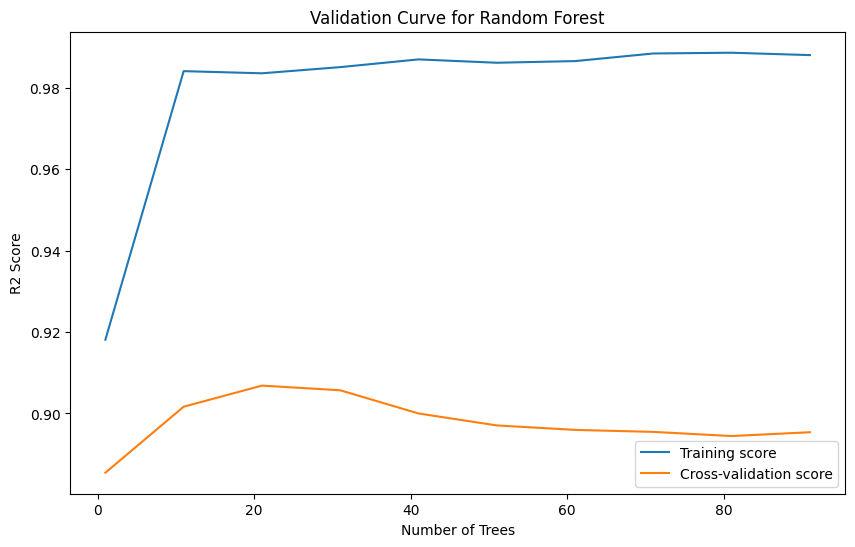

In [ ]:
#Validation curve
from sklearn.model_selection import validation_curve

param_range = np.arange(1, 100, 10)
train_scores, test_scores = validation_curve(
    RandomForestRegressor(random_state=101), X_train, y_train, param_name="n_estimators",
    param_range=param_range, cv=5, scoring="r2", n_jobs=-1
)

plt.figure(figsize=(10, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training score")
plt.plot(param_range, np.mean(test_scores, axis=1), label="Cross-validation score")
plt.title("Validation Curve for Random Forest")
plt.xlabel("Number of Trees")
plt.ylabel("R2 Score")
plt.legend()
plt.show()

#### Forecasting CO2 emission based on RFR

In [ ]:
#Create future data for the next five years for the three countries
X_new_emission = X_scaled
X_new_emission['Entity']=df['Entity']
X_new_emission['CO2 emissions value by country (kT)']=df['CO2 emissions value by country (kT)']

#X_new_energy.head()

uk_data = X_new_emission[X_new_emission['Entity']=='Nigeria']

#uk_data.head()

future_years = np.arange(2021, 2026)  # Future years from 2021 to 2026
uk_data_extended_years = pd.concat([uk_data] * len(future_years), ignore_index=True)
uk_data_extended_years['Year'] = np.tile(future_years, len(uk_data))
uk_data_extended_years.tail()

,Year,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),GDP growth,GDP per capita,Density (P/km2),Entity,CO2 emissions value by country (kT)
100,2021,1.697836,-0.133933,-0.187525,-0.335192,-0.668856,0.306907,-0.931017,-0.586777,0.003552,Nigeria,110830.001800
101,2022,1.708151,-0.130562,-0.187525,-0.388432,-0.672597,0.292330,-0.485107,-0.597735,0.003552,Nigeria,108500.000000
102,2023,1.706776,-0.133299,-0.187525,-0.366432,-0.669635,0.248596,-0.279546,-0.594607,0.003552,Nigeria,109889.999400
103,2024,1.676520,-0.136037,-0.187525,-0.292463,-0.669030,0.315654,-0.226968,-0.583932,0.003552,Nigeria,115279.998800
104,2025,0.000000,-0.139438,-0.187525,-0.314646,-0.670117,0.000000,-0.963665,-0.590946,0.003552,Nigeria,159866.462686


In [ ]:
#droping entity and target variable for modeling purpose
uk_extended_years_model = uk_data_extended_years.drop(columns=['Entity',
                                                               'CO2 emissions value by country (kT)'])
#uk_extended_years_model

In [ ]:
# CREATE THE MODEL
rf_model = RandomForestRegressor(random_state=101)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=101)

In [ ]:
predictions_energy = rf_model.predict(uk_extended_years_model)

# Display the predictions
predictions_df = pd.DataFrame({'Year': uk_extended_years_model['Year'], 'Predicted_Emission': predictions_energy})
print(predictions_df)

     Year  Predicted_Emission
0    2021       159866.462686
1    2022       159866.462686
2    2023       159866.462686
3    2024       159866.462686
4    2025       159866.462686
..    ...                 ...
100  2021       159866.462686
101  2022       159866.462686
102  2023       159866.462686
103  2024       159866.462686
104  2025       159866.462686

[105 rows x 2 columns]
